<a href="https://colab.research.google.com/github/csabiu/ML_tutorial/blob/master/GZ_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary packages



In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

print(tf.__version__)

1.13.1


#Download data sample

In [1]:
!wget -q https://github.com/csabiu/ML_tutorial/blob/master/class.tar.gz.parta{a,b,c,d,e,f,g,h,i}?raw=true > tmp
!cat class.tar.gz.parta*true > class.tar.gz
!gunzip class.tar.gz
!tar -xvf class.tar > tmp
!rm class.tar*
!rm tmp
!ls

class  sample_data


## Lets look at an image



(424, 424, 3)


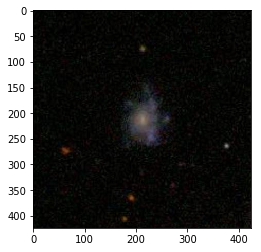

In [5]:
jpgfile = Image. open("class/100134.jpg")
plt.imshow(jpgfile)
print(np.shape(jpgfile))


# Lets crop it

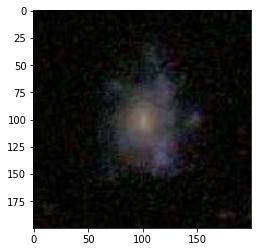

In [6]:
plt.imshow(jpgfile.crop((112,112,312,312)))

# And lower the resolution

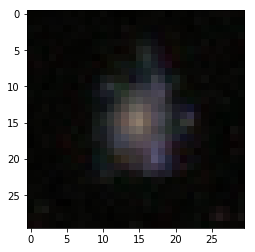

In [7]:
plt.imshow(jpgfile.crop((112,112,312,312)).resize((30,30),Image.ANTIALIAS))

# Split into RGB colors

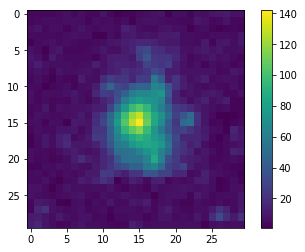

In [8]:
r,g,b=jpgfile.split()
plt.imshow(r.crop((112,112,312,312)).resize((30,30),Image.ANTIALIAS))
plt.colorbar()

# Normalise the pixel values to (0,1)

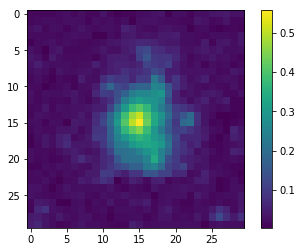

In [9]:
im=np.zeros((30,30))
im[:,:]=r.crop((112,112,312,312)).resize((30,30),Image.ANTIALIAS)
im=im/255.
plt.imshow(im)
plt.colorbar()

# Load the labels (truth) data

(Image ID, galaxy type) - 0=smooth, 1=featured

In [10]:
data=np.loadtxt("class/truth.txt",dtype='i')
print(np.shape(data))
labels=data[:,1]

print(data[1:10,:]) # print first 10 entries

(16885, 2)
[[100134      1]
 [100322      1]
 [100380      1]
 [100458      0]
 [100479      0]
 [100520      1]
 [100672      0]
 [100673      1]
 [100724      0]]


# Lets transform all the images and save into an array

In [11]:
images=np.zeros((16885,30,30,3))
nn=0

for i in (data[:,0]):
  filename=str(int(i))+".jpg"
  jpgfile = Image. open("./class/"+filename)  
  images[nn,:,:,:]=jpgfile.crop((112,112,312,312)).resize((30,30),Image.ANTIALIAS)
  nn=nn+1

images=images/255.
print(np.shape(images))

(16885, 30, 30, 3)


# Split images and labels into training and test data

In [14]:
images=images.mean(axis=3) # average colour -> greyscale
train_data=images[:13000,:,:]
test_data=images[13000:,:,:]

train_label=labels[:13000]
test_label=labels[13000:]

print(np.shape(train_data))
print(np.shape(train_label))
print(np.shape(test_data))
print(np.shape(test_label))

IndexError: ignored

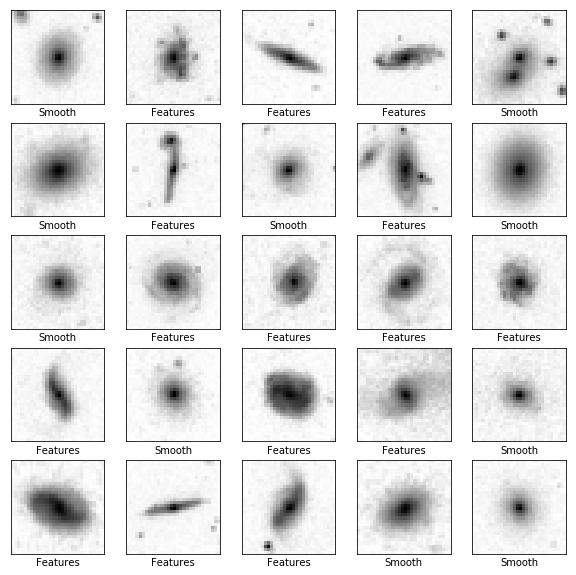

In [16]:
class_names = ['Smooth', 'Features']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_label[i])])
plt.show()

# Define a simple neural network

In [17]:
from keras.utils.vis_utils import plot_model
keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30, 30)),
    keras.layers.Dense(900, activation=tf.nn.sigmoid),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),    
    keras.layers.Dense(2, activation=tf.nn.softmax)])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 900)               810900    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                57664     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 868,694
Trainable params: 868,694
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(train_data[:,:,:], train_label, epochs=7)

Epoch 1/7
13000/13000 [==============================] - 8s 641us/sample - loss: 0.5908 - acc: 0.6887
Epoch 2/7
13000/13000 [==============================] - 8s 609us/sample - loss: 0.5220 - acc: 0.7332
Epoch 3/7
13000/13000 [==============================] - 8s 606us/sample - loss: 0.4625 - acc: 0.7793
Epoch 4/7
13000/13000 [==============================] - 8s 612us/sample - loss: 0.3877 - acc: 0.8371
Epoch 5/7
13000/13000 [==============================] - 8s 604us/sample - loss: 0.3520 - acc: 0.8613
Epoch 6/7
13000/13000 [==============================] - 8s 614us/sample - loss: 0.3231 - acc: 0.8763
Epoch 7/7
13000/13000 [==============================] - 8s 607us/sample - loss: 0.3143 - acc: 0.8772


In [19]:
test_loss, test_acc = model.evaluate(test_data[:,:,:], test_label)
print('Test accuracy:', test_acc)

3885/3885 [==============================] - 0s 95us/sample - loss: 0.3169 - acc: 0.8819
Test accuracy: 0.8818533


Set up some of plotting functions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([0,1])
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  #f, axarr = plt.subplots(2, sharex=True)
  #axarr[0].set_xticklabels(['smooth', 'features'])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Make predictions on test data from the trained model

In [21]:
predictions = (model.predict(test_data[:,:,:]))

print("First 10 galaxies")
print("Predicted:",np.argmax(predictions[1:11],axis=1))
print("Truth:    ",np.int_(test_label[1:11]))

First 10 galaxies
Predicted: [1 1 1 1 1 1 1 0 0 1]
Truth:     [1 1 0 1 0 1 1 0 1 1]


# Lets visialise these classifications

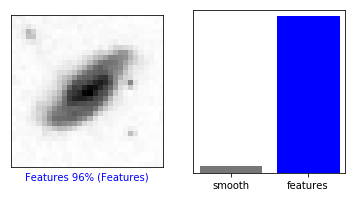

In [22]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, np.int_(test_label), test_data)
f=plt.subplot(1,2,2)
plot_value_array(i, predictions,  np.int_(test_label))
f.axes.set_xticklabels(["smooth","features"])
plt.show()

 Plot the first X test images, their predicted label, and the true label
 Color correct predictions in blue, incorrect predictions in red

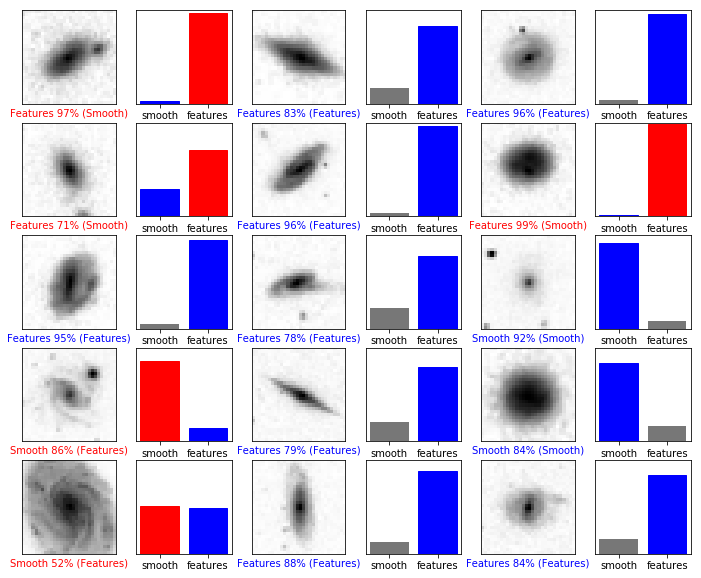

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, np.int_(test_label), test_data)
  f=plt.subplot(num_rows, 2*num_cols, 2*i+2)
  f.axes.set_xticklabels(["smooth","features"])
  plot_value_array(i, predictions, np.int_(test_label))
plt.show()


# Define a new convolutional neural network model

In [24]:
keras.backend.clear_session()
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
___________________________

# Train the model on the training data

In [25]:
model.fit(np.expand_dims(train_data, axis=3), train_label, epochs=7)

Epoch 1/7
13000/13000 [==============================] - 34s 3ms/sample - loss: 0.4983 - acc: 0.7305
Epoch 2/7
13000/13000 [==============================] - 34s 3ms/sample - loss: 0.2773 - acc: 0.8918
Epoch 3/7
13000/13000 [==============================] - 34s 3ms/sample - loss: 0.2304 - acc: 0.9118
Epoch 4/7
13000/13000 [==============================] - 35s 3ms/sample - loss: 0.2083 - acc: 0.9222
Epoch 5/7
13000/13000 [==============================] - 35s 3ms/sample - loss: 0.1877 - acc: 0.9305
Epoch 6/7
13000/13000 [==============================] - 35s 3ms/sample - loss: 0.1715 - acc: 0.9352
Epoch 7/7
13000/13000 [==============================] - 34s 3ms/sample - loss: 0.1513 - acc: 0.9450


# Now make prediction and visualise 
# Compare to previous plot

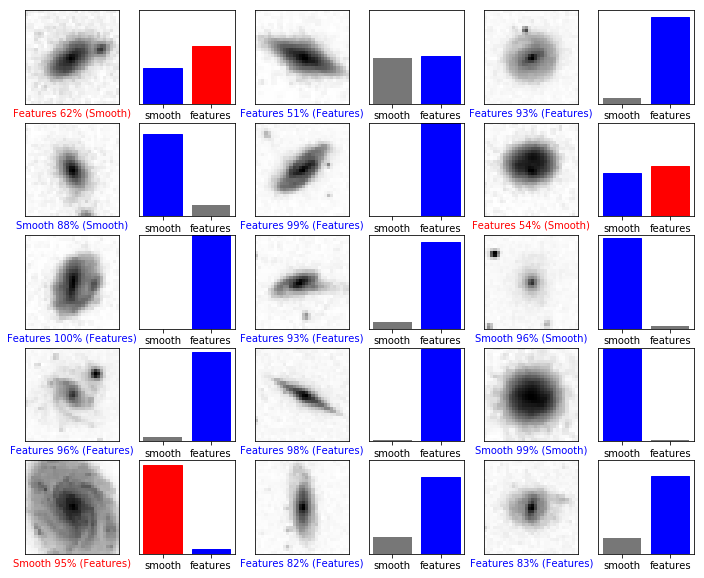

In [26]:
predictions = (model.predict(np.expand_dims(test_data, axis=3)))

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, np.int_(test_label), test_data)
  f=plt.subplot(num_rows, 2*num_cols, 2*i+2)
  f.axes.set_xticklabels(["smooth","features"])
  plot_value_array(i, predictions, np.int_(test_label))
plt.show()

# Now add some data augmentations

In [31]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=.2, 
                             height_shift_range=.2,
fill_mode='nearest')
datagen.fit(np.expand_dims(train_data, axis=3))

history = model.fit_generator(datagen.flow(np.expand_dims(train_data, axis=3), train_label, batch_size=20),
                        steps_per_epoch=train_data.shape[0] // 20,
                        epochs=5,
validation_data=(np.expand_dims(test_data, axis=3), test_label))

Epoch 1/5
650/650 [==============================] - 49s 75ms/step - loss: 0.1435 - acc: 0.9470 - val_loss: 0.0792 - val_acc: 0.9761
Epoch 2/5
650/650 [==============================] - 49s 75ms/step - loss: 0.1395 - acc: 0.9484 - val_loss: 0.0814 - val_acc: 0.9707
Epoch 3/5
650/650 [==============================] - 46s 71ms/step - loss: 0.1341 - acc: 0.9493 - val_loss: 0.0950 - val_acc: 0.9678
Epoch 4/5
650/650 [==============================] - 44s 68ms/step - loss: 0.1324 - acc: 0.9516 - val_loss: 0.0845 - val_acc: 0.9714
Epoch 5/5
650/650 [==============================] - 43s 67ms/step - loss: 0.1258 - acc: 0.9529 - val_loss: 0.0761 - val_acc: 0.9707


# Test the trained model on the test data

In [32]:
test_loss, test_acc = model.evaluate(np.expand_dims(test_data, axis=3), test_label)
print('Test accuracy:', test_acc)

3885/3885 [==============================] - 3s 714us/sample - loss: 0.0763 - acc: 0.9707
Test accuracy: 0.9706564


# Now make prediction and visualise 
# Compare to previous plot

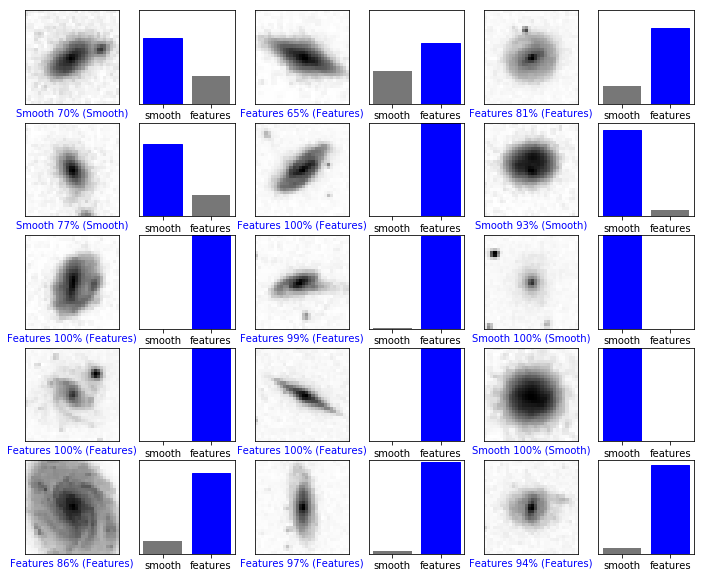

In [33]:
predictions = (model.predict(np.expand_dims(test_data, axis=3)))

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, np.int_(test_label), test_data)
  f=plt.subplot(num_rows, 2*num_cols, 2*i+2)
  f.axes.set_xticklabels(["smooth","features"])
  plot_value_array(i, predictions, np.int_(test_label))
plt.show()